In [1]:
# import classifiers
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import (LogisticRegression, 
                                  RidgeClassifier,
                                  PassiveAggressiveClassifier, 
                                  SGDClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              ExtraTreesClassifier, 
                              AdaBoostClassifier,
                              GradientBoostingClassifier)

# import preprocessing routines
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline

# import utils for hyper-param search and metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier

# validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             precision_score, recall_score, f1_score,
                             average_precision_score,
                             roc_curve, auc, roc_auc_score,
                             precision_recall_curve, # binary classification only
                             jaccard_similarity_score,
                             hamming_loss,
                             confusion_matrix, 
                             classification_report)

# to generate data
from sklearn.datasets import make_classification

# to viz in 2-dim
from sklearn.decomposition import PCA

# to draw ipywidgets
from ipywidgets import *  
from IPython.display import display, Image
plt.style.use('fivethirtyeight')

# to ignore deprecation warnings
import sys, warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# def func to generate data for multi-class classification 
def gen_classification_data(n_samples, n_features=30, n_informative=20, n_redundant=5, n_classes=3, random_state=None):

    X, y = make_classification(n_samples=n_samples, 
                              n_features=n_features, 
                              n_informative=n_informative, 
                              n_redundant=n_redundant,
                              n_classes=n_classes, 
                              random_state=random_state)
    ss = StandardScaler()
    X = ss.fit_transform(X)
    
    return X, y

In [3]:
X, y = gen_classification_data(n_samples=300,n_features=30,n_informative=20,n_redundant=5,n_classes=3,random_state=0)
X.shape, y.shape, np.unique(y)

((300, 30), (300,), array([0, 1, 2]))

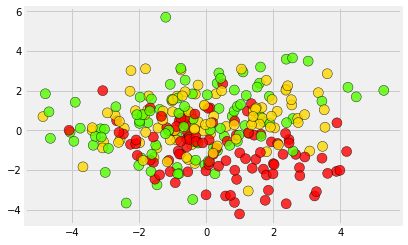

In [4]:
Dim_R = PCA(n_components=2)
X_2d = Dim_R.fit_transform(X)
plt.scatter(X_2d[:,0],X_2d[:,1], c=y, cmap=plt.cm.prism, s=99, alpha=.8, edgecolors='k');

In [5]:
estimators = [
    
    'DummyClassifier',
    
    # linear
    'LogisticRegression', 
    'RidgeClassifier', # coef_ 
    'PassiveAggressiveClassifier', # coef_ 
    'SGDClassifier', # coef_
    
    # kNN
    'KNeighborsClassifier',
    
    # Bayesian Methods
    'LinearDiscriminantAnalysis', # coef_
    'QuadraticDiscriminantAnalysis', # means_ 
    'GaussianNB', 
    'BernoulliNB',

    # SVM
    'SVC', 
    
    # Trees
    'DecisionTreeClassifier',
    
    # Ensembles
    'RandomForestClassifier', # feature_importances_
    'ExtraTreesClassifier', # feature_importances_
    'AdaBoostClassifier', # feature_importances_
    'GradientBoostingClassifier', # feature_importances_
    
]   

In [6]:
 # specify hyper-space search parameters 

estimator_gridsearch_params = {
    
    'DummyClassifier': {'search_hparams': {
    }},  
    
    'RidgeClassifier': {'search_hparams': dict(
            alpha=np.logspace(1,3,3),
        )
    },
    
    'KNeighborsClassifier': {'search_hparams': {
        'n_neighbors':[3,5,9],
        'weights':['uniform','distance'],
        'algorithm':['ball_tree','kd_tree','brute'], 
        'n_jobs':[-1], 
    }},
     
    'LinearDiscriminantAnalysis': {'search_hparams': {
        'solver':['svd', 'lsqr'], # 'eigen'
        'n_components':[2,3,5,10],
    }},
    
    'QuadraticDiscriminantAnalysis': {'search_hparams': {
        'reg_param':np.linspace(0,1,5)
    }},
    
    'GaussianNB': {'search_hparams': {
    }},
    
    'BernoulliNB':  {'search_hparams': {
        'alpha': np.linspace(0,1,6),
        'binarize':np.linspace(0,1,6),
    }},
    
    'SVC': {'search_hparams': {
        'C':np.linspace(0.2,1,5),
        'kernel':['poly','rbf','sigmoid'],
        'degree':[1,2,3,5],
        'gamma':['scale'],
    }},     
    
    'AdaBoostClassifier': {'search_hparams': {
        'n_estimators':[30,50,100,200],
    }},    
    
}
    
estimator_randomizedsearch_params = {    

    'LogisticRegression': {'search_hparams': {
        #'penalty':['l1','l2'], 
        'C':np.logspace(-5,0,6),
        'solver':['newton-cg', 'lbfgs', 'sag'], 
        'multi_class': ['ovr', 'multinomial'],
        'max_iter':[100,300,600,900],
        'n_jobs':[-1],
    }}, 
    
    'PassiveAggressiveClassifier': {'search_hparams': {
        'C':np.logspace(-5,0,6),
        'n_iter':[5,10,30], 
        'loss':['hinge','squared_hinge']  ,  
        'n_jobs':[-1],
    }},
    
    'SGDClassifier': {'search_hparams': {
        'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'penalty':['l1','l2','elasticnet'],
        'alpha': np.logspace(-5,-1,5),
        'l1_ratio': np.linspace(0,1,5),
        'max_iter':[3000],
        'tol':[1e-3],
        'n_jobs':[-1],  
    }},
    
    'DecisionTreeClassifier': {'search_hparams': {
        'max_features':np.linspace(.1,1,10),
        'max_depth':[2,3,5,7],
    }},
    
    'RandomForestClassifier': {'search_hparams': {
        'n_estimators':[10,30,50,100],
        'max_features':np.linspace(.2,1,5),
        'max_depth':[2,3,5,7],
        'bootstrap': [True, False],
        'n_jobs':[-1],
    }},
    
    'ExtraTreesClassifier': {'search_hparams': {
        'n_estimators':[10,30,50],
        'max_features':np.linspace(.1,1,10),
        'max_depth':[2,3,5,7],
        'bootstrap': [True, False],
        'n_jobs':[-1], 
    }},

    'GradientBoostingClassifier': {'search_hparams': {
        #'loss':['deviance','exponential'],
        'n_estimators': [50,100,300,600],
        'max_depth':[3,5,8],
        'max_features':np.linspace(.2,1,5),            
        'subsample':np.linspace(.2,1,5),
    }},
    
}

In [7]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# arrays to keep scores
accuracy_score_ary = []
precision_score_ary = []
recall_score_ary = []
f1_score_ary = []
jaccard_similarity_score_ary = [] 
hamming_loss_ary = []



for est_str in estimators:
 
    # instantiate regressors
    est = eval( est_str + '()' ) 
    s_est = None
    hyper_params = None
    
    
    if est_str in estimator_gridsearch_params:
        hyper_params = estimator_gridsearch_params[est_str]['search_hparams']
        s_est = GridSearchCV( est, param_grid=hyper_params, cv=5, n_jobs=-1, )
        
    elif est_str in estimator_randomizedsearch_params:
        hyper_params = estimator_randomizedsearch_params[est_str]['search_hparams']
        s_est = RandomizedSearchCV( est, param_distributions=hyper_params, n_iter=30, cv=5, n_jobs=-1, random_state=0)
        
    else:
        raise Exception('wrong est_str (%s)' % est_str)  

        
    # fit and predict with meta-estimators
    s_est.fit(X_train, y_train.ravel())
    y_pred = s_est.predict(X_test)
    
    
    # compute scores
    best_est = s_est.best_estimator_
    print(best_est)
    accuracy_score_ary.append(            (best_est.__class__.__name__, accuracy_score(y_test, y_pred)) )
    precision_score_ary.append(           (best_est.__class__.__name__, precision_score(y_test, y_pred, average='micro')) )
    recall_score_ary.append(              (best_est.__class__.__name__, recall_score(y_test, y_pred, average='micro')) )
    f1_score_ary.append (                 (best_est.__class__.__name__, f1_score(y_test, y_pred, average='micro') ))
    jaccard_similarity_score_ary.append ( (best_est.__class__.__name__, jaccard_similarity_score(y_test, y_pred) ))
    hamming_loss_ary.append (             (best_est.__class__.__name__, hamming_loss(y_test, y_pred) ))    
    print()

DummyClassifier(constant=None, random_state=None, strategy='stratified')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

RidgeClassifier(alpha=10.0, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=None, normalize=False,
        random_state=None, solver='auto', tol=0.001)

PassiveAggressiveClassifier(C=0.01, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=30, n_iter_no_change=5, n_jobs=-1,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.25, l

In [8]:
# sort classifiers by avg sore

df = pd.DataFrame(accuracy_score_ary, columns=['Est','Acc']).sort_values(by='Acc', ascending=True).reset_index(drop=1)
a_s = pd.Series(df.index, index=df.Est)

df = pd.DataFrame(precision_score_ary, columns=['Est','Pre']).sort_values(by='Pre', ascending=True).reset_index(drop=1)
p_s = pd.Series(df.index, index=df.Est)

df = pd.DataFrame(recall_score_ary, columns=['Est','Rec']).sort_values(by='Rec', ascending=True).reset_index(drop=1)
r_s = pd.Series(df.index, index=df.Est)

df = pd.DataFrame(f1_score_ary, columns=['Est','F1']).sort_values(by='F1', ascending=True).reset_index(drop=1)
f_s = pd.Series(df.index, index=df.Est)

df = pd.DataFrame(jaccard_similarity_score_ary, columns=['Est','Jac']).sort_values(by='Jac', ascending=True).reset_index(drop=1)
j_s = pd.Series(df.index, index=df.Est)

df = pd.DataFrame(hamming_loss_ary, columns=['Est','Ham']).sort_values(by='Ham', ascending=False).reset_index(drop=1)
h_s = pd.Series(df.index, index=df.Est)

df = (pd.DataFrame(pd.concat([a_s, p_s, r_s, f_s, j_s, h_s], axis=1))
          .reset_index()
          .rename(columns={'index':'Est',0:'Accuracy',1:'Precision',2:'Recall',3:'F1',4:'Jaccard',5:'Hamming'}))

df.insert(1,'CumScore', df.iloc[:,1:].apply(np.sum, axis=1))
df = df.sort_values(by='CumScore', ascending=False).reset_index(drop=True)
df

,Est,CumScore,Accuracy,Precision,Recall,F1,Jaccard,Hamming
0,ExtraTreesClassifier,90,15,15,15,15,15,15
1,QuadraticDiscriminantAnalysis,84,14,14,14,14,14,14
2,SVC,78,13,13,13,13,13,13
3,RidgeClassifier,72,12,12,12,12,12,12
4,LinearDiscriminantAnalysis,66,11,11,11,11,11,11
5,SGDClassifier,60,10,10,10,10,10,10
6,RandomForestClassifier,54,9,9,9,9,9,9
7,LogisticRegression,48,8,8,8,8,8,8
8,GradientBoostingClassifier,42,7,7,7,7,7,7
9,PassiveAggressiveClassifier,36,6,6,6,6,6,6


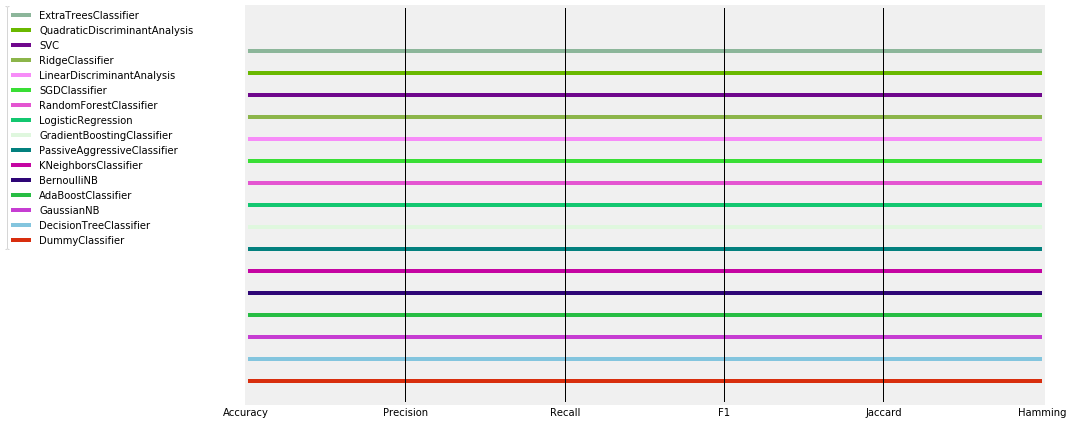

In [9]:
# show classifiers in a parallel chart

plt.figure(figsize=(16,6))
plt.ylim(-.1, len(estimators)+1)
from pandas.plotting import parallel_coordinates
parallel_coordinates(df.drop('CumScore',axis=1), 'Est')
plt.yticks(())
plt.ylim(-1, len(estimators)+1)
plt.legend(bbox_to_anchor=(-.3, 1), loc=1, mode="expand", borderaxespad=0.)
plt.tight_layout();

In [10]:
# see PR Curve for each classifier by way of visual interactive analysis

w_est_str = widgets.Dropdown(options=estimators, value=df.iloc[0,0], description='Estimator ', continuous_update=False)
w_best_est = Textarea(disabled=True, layout=Layout(width='100%', height='200px'))

@interact(est_str=w_est_str)
def show_prediction(est_str):
    
    est = eval( est_str + '()' ) 
    s_est = None
    hyper_params = None
    
    if est_str in estimator_gridsearch_params:
        hyper_params = estimator_gridsearch_params[est_str]['search_hparams']
        s_est = GridSearchCV( est, param_grid=hyper_params, cv=5, n_jobs=-1, )
        
    elif est_str in estimator_randomizedsearch_params:
        hyper_params = estimator_randomizedsearch_params[est_str]['search_hparams']
        s_est = RandomizedSearchCV( est, param_distributions=hyper_params, n_iter=30, cv=5, n_jobs=-1, random_state=0)
        
    else:
        raise Exception('wrong est_str (%s)' % est_str)  

    # fit and predict with meta-estimators
    s_est.fit(X_train, y_train.ravel())
    y_pred = s_est.predict(X_test)
    
    best_est = s_est.best_estimator_
    w_best_est.value = str(best_est)
    w_best_est.value += "\nAccuracy: %s" % best_est.score(X_test, y_test)
    
    try:
        plot_PR_curve(best_est,X,y)
    except:
        print( str(sys.exc_info()[1]) )
        plt.gcf().clear()

    
display(w_best_est);    

interactive(children=(Dropdown(description='Estimator ', index=13, options=('DummyClassifier', 'LogisticRegres…

Textarea(value="ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',\n           max_dep…

In [11]:
# see which features are the most important for each classifier by way of visual interactive analysis

w_est_str = widgets.Dropdown(options=estimators, value=df.iloc[0,0],description='Estimator ',continuous_update=False)
w_top_N_features = widgets.IntSlider(min=1,max=30,step=1,value=5,description='Top N Features',continuous_update=False)
w_abs_values = widgets.Checkbox(value=True,description='Absolute Values')
w_best_est = Textarea(disabled=True, layout=Layout(width='100%', height='200px'))

@interact(est_str=w_est_str, top_N_features=w_top_N_features, abs_values=w_abs_values)
def show_prediction(est_str, top_N_features, abs_values):
    
    est = eval( est_str + '()' ) 
    s_est = None
    hyper_params = None
    
    if est_str in estimator_gridsearch_params:
        hyper_params = estimator_gridsearch_params[est_str]['search_hparams']
        s_est = GridSearchCV( est, param_grid=hyper_params, cv=5, n_jobs=-1, )
        
    elif est_str in estimator_randomizedsearch_params:
        hyper_params = estimator_randomizedsearch_params[est_str]['search_hparams']
        s_est = RandomizedSearchCV( est, param_distributions=hyper_params, n_iter=30, cv=5, n_jobs=-1, random_state=0)
        
    else:
        raise Exception('wrong est_str (%s)' % est_str)  

    # fit and predict with meta-estimators
    s_est.fit(X_train, y_train.ravel())
    y_pred = s_est.predict(X_test)
    
    clf = s_est.best_estimator_
    w_best_est.value = str(clf)
    w_best_est.value += "\nBest Score: %s" % clf.score(X_test, y_test)
    
    if hasattr(clf,'feature_importances_'):
        
        cutoff = clf.feature_importances_[np.argsort(clf.feature_importances_)[-top_N_features]]
        bar_color = np.where(clf.feature_importances_ >= cutoff,'m','c')
        pd.DataFrame(clf.feature_importances_).plot.bar(color=bar_color)
        plt.hlines(cutoff,0,29, color='k', lw=3, linestyle=':', alpha=.8)
        plt.legend([]);
        
    elif hasattr(clf,'coef_'):
        
        for c in range(clf.coef_.shape[0]):
            if abs_values:
                cutoff = np.argsort(np.abs(clf.coef_[c,:]))[-top_N_features]
                clf.coef_[c] *= np.where( np.abs(clf.coef_[c,:]) >= np.abs(clf.coef_[c,cutoff]), 1, 0)
            else:
                cutoff = np.argsort(clf.coef_[c,:])[-top_N_features]
                clf.coef_[c] *= np.where( clf.coef_[c,:] >= clf.coef_[c,cutoff], 1, 0)
        pd.DataFrame(clf.coef_.T).plot.bar();
        
    elif hasattr(clf,'means_'):
        
        # plt.figure(figsize=(15,5))
        for c in range(clf.means_.shape[0]):
            if abs_values:
                cutoff = np.argsort(np.abs(clf.means_[c,:]))[-top_N_features]
                clf.means_[c] *= np.where( np.abs(clf.means_[c,:]) >= np.abs(clf.means_[c,cutoff]), 1, 0)
            else:
                cutoff = np.argsort(clf.means_[c,:])[-top_N_features]
                clf.means_[c] *= np.where( clf.means_[c,:] >= clf.means_[c,cutoff], 1, 0)
        pd.DataFrame(clf.means_.T).plot.bar();
        
        plt.figure(figsize=(13,3))
        if abs_values:
            plt.imshow(np.abs(clf.means_))
        else:
            plt.imshow(clf.means_)
        plt.yticks([0,1,2])
        plt.grid(axis='y')
        plt.legend([])
        plt.colorbar();
    
    else:
        print('Est %s does not have any attribute to select the best features!' % clf)  
    
    plt.legend([]);
    
    
display(w_best_est);    

interactive(children=(Dropdown(description='Estimator ', index=13, options=('DummyClassifier', 'LogisticRegres…

Textarea(value="ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',\n           max_dep…

### THE END